MSE: 275.57
R²: 0.95


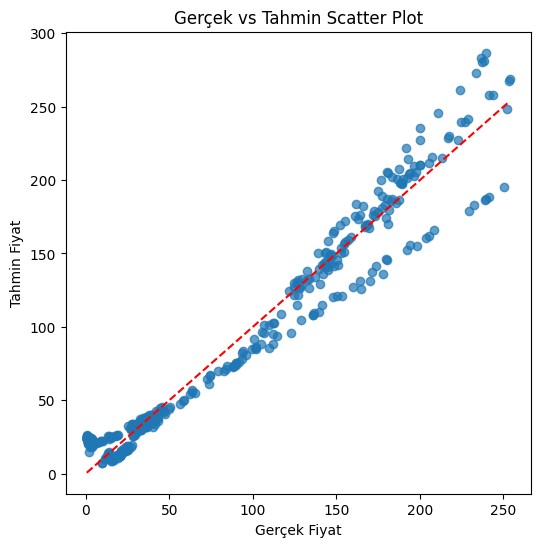

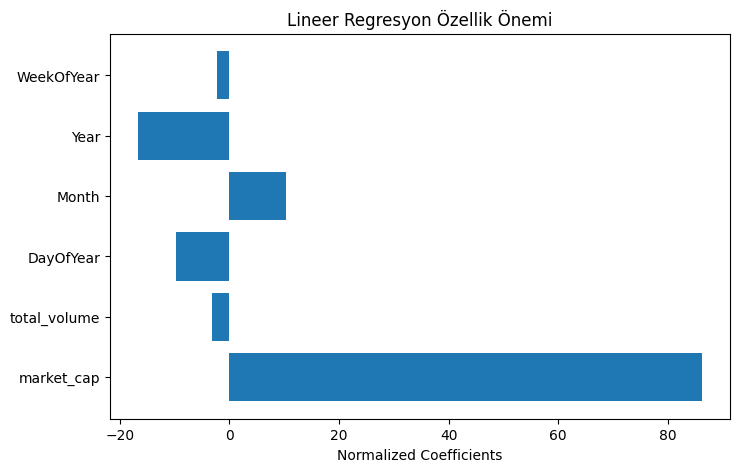

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1️ Veri Yükleme
file_path = '/content/sol-usd-max.csv'
df = pd.read_csv(file_path)

# 2️ Tarih kolonunu datetime formatına çevirme ve yeni özellikler ekleme
df['snapped_at'] = pd.to_datetime(df['snapped_at'])
df['DayOfYear'] = df['snapped_at'].dt.dayofyear
df['Month'] = df['snapped_at'].dt.month
df['Year'] = df['snapped_at'].dt.year
df['WeekOfYear'] = df['snapped_at'].dt.isocalendar().week

# 3 Target ve feature'ları belirleme
target = 'price'
features = ['market_cap', 'total_volume', 'DayOfYear', 'Month', 'Year', 'WeekOfYear']

X = df[features]
y = df[target]

# 4️ Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5️ Modeli oluşturma ve eğitme
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 6️ Tahmin
y_pred = lin_reg.predict(X_test)

# 7️ Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# 8️ Scatter plot: Gerçek vs Tahmin
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Fiyat')
plt.title('Gerçek vs Tahmin Scatter Plot')
plt.show()

# 9️ Özellik önem grafiği (katsayıları normalize ederek)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model_scaled = LinearRegression()
model_scaled.fit(X_scaled, y)
coefficients = model_scaled.coef_

plt.figure(figsize=(8,5))
plt.barh(features, coefficients)
plt.xlabel('Normalized Coefficients')
plt.title('Lineer Regresyon Özellik Önemi')
plt.show()
